<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); color: white; padding: 40px; margin: -10px -10px 20px -10px; border-radius: 0 0 15px 15px;">
<h1 style="margin: 0; font-size: 2.5em;">Schematic Design & Simulation</h1>
<p style="margin: 10px 0 0 0; font-size: 1.2em; opacity: 0.9;">Week 2, Session 1 — Fab Futures</p>
</div>

## Contents

1. [Schematic Capture Basics](#1-schematic-capture-basics)
2. [SPICE Simulation](#2-spice-simulation)
3. [Analysis Types](#3-analysis-types)
4. [Libraries and PDKs](#4-libraries-and-pdks)
5. [Behavioral Modeling](#5-behavioral-modeling)
6. [Simulation Tips](#6-simulation-tips)

In [1]:
# Setup
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, Circle, Rectangle
import numpy as np

print("Setup complete.")

Setup complete.


---
<a id="1-schematic-capture-basics"></a>
# 1. Schematic Capture Basics
---

### What is a Schematic?

A **schematic** is a graphical representation of a circuit using symbols for components and lines for wires.

### Schematic Capture Tools

| Tool | Type | Notes |
|------|------|-------|
| **Xschem** | Open source | Integrates with ngspice |
| **KiCad** | Open source | Great for PCB design too |
| **Cadence Virtuoso** | Commercial | Industry standard for IC |

### Basic Schematic Elements

| Element | Symbol | Purpose |
|---------|--------|--------|
| **Wire** | Line | Electrical connection |
| **Net label** | Text | Names a wire (same name = connected) |
| **Instance** | Symbol | A component (resistor, transistor, etc.) |
| **Port** | I/O marker | Input/output of the circuit |
| **Ground** | GND symbol | Reference voltage (0V) |

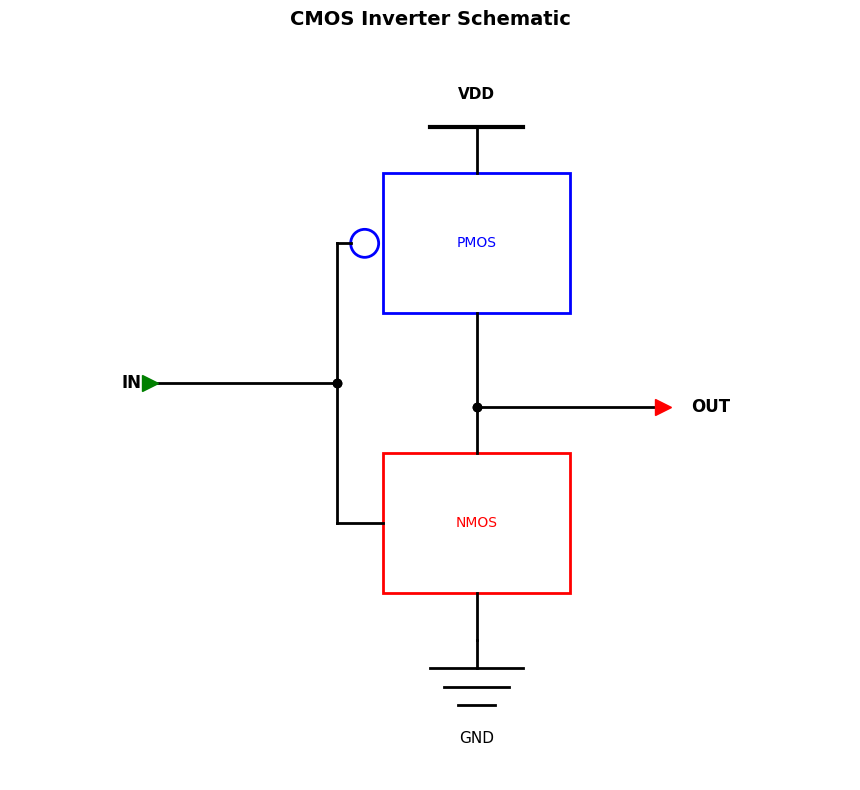

In [2]:
# Simple schematic: Inverter
fig, ax = plt.subplots(figsize=(10, 8))

# VDD rail
ax.plot([5, 5], [7, 6.5], 'k-', linewidth=2)
ax.plot([4.5, 5.5], [7, 7], 'k-', linewidth=3)
ax.text(5, 7.3, 'VDD', ha='center', fontsize=11, fontweight='bold')

# PMOS (circle on gate)
ax.add_patch(Rectangle((4, 5), 2, 1.5, fill=False, edgecolor='blue', linewidth=2))
ax.text(5, 5.75, 'PMOS', ha='center', va='center', fontsize=10, color='blue')
ax.add_patch(Circle((3.8, 5.75), 0.15, fill=False, edgecolor='blue', linewidth=2))

# PMOS connections
ax.plot([5, 5], [6.5, 6.5], 'k-', linewidth=2)  # drain to VDD
ax.plot([5, 5], [5, 4], 'k-', linewidth=2)  # source to output
ax.plot([3.5, 3.65], [5.75, 5.75], 'k-', linewidth=2)  # gate

# NMOS
ax.add_patch(Rectangle((4, 2), 2, 1.5, fill=False, edgecolor='red', linewidth=2))
ax.text(5, 2.75, 'NMOS', ha='center', va='center', fontsize=10, color='red')

# NMOS connections
ax.plot([5, 5], [3.5, 4], 'k-', linewidth=2)  # drain to output
ax.plot([5, 5], [2, 1.5], 'k-', linewidth=2)  # source to GND
ax.plot([3.5, 4], [2.75, 2.75], 'k-', linewidth=2)  # gate

# Connect gates
ax.plot([3.5, 3.5], [2.75, 5.75], 'k-', linewidth=2)
ax.plot([1.5, 3.5], [4.25, 4.25], 'k-', linewidth=2)  # input
ax.plot([3.5, 3.5], [4.25, 4.25], 'ko', markersize=6)  # junction dot

# Output
ax.plot([5, 7], [4, 4], 'k-', linewidth=2)
ax.plot([5, 5], [4, 4], 'ko', markersize=6)  # junction dot

# GND symbol
ax.plot([5, 5], [1.5, 1.2], 'k-', linewidth=2)
ax.plot([4.5, 5.5], [1.2, 1.2], 'k-', linewidth=2)
ax.plot([4.65, 5.35], [1.0, 1.0], 'k-', linewidth=2)
ax.plot([4.8, 5.2], [0.8, 0.8], 'k-', linewidth=2)
ax.text(5, 0.4, 'GND', ha='center', fontsize=11)

# Labels
ax.text(1.2, 4.25, 'IN', fontsize=12, fontweight='bold', va='center')
ax.text(7.3, 4, 'OUT', fontsize=12, fontweight='bold', va='center')

# Input/output markers
ax.plot([1.5], [4.25], 'g>', markersize=12)
ax.plot([7], [4], 'r>', markersize=12)

ax.set_xlim(0, 9)
ax.set_ylim(0, 8)
ax.set_aspect('equal')
ax.set_title('CMOS Inverter Schematic', fontsize=14, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

---
<a id="2-spice-simulation"></a>
# 2. SPICE Simulation
---

### What is SPICE?

**SPICE** (Simulation Program with Integrated Circuit Emphasis) is the industry standard for analog circuit simulation.

### SPICE Netlist Format

```spice
* Inverter circuit
.include "sky130.lib"

* Power supply
Vdd vdd gnd 1.8

* Input signal (rise/fall times realistic for 130nm)
Vin in gnd PULSE(0 1.8 0 100p 100p 1n 2n)

* PMOS: drain gate source body
Mp out in vdd vdd sky130_fd_pr__pfet_01v8 W=1u L=150n

* NMOS: drain gate source body
Mn out in gnd gnd sky130_fd_pr__nfet_01v8 W=0.5u L=150n

* Simulation commands
.tran 10p 10n
.end
```

### Netlist Elements

| First Letter | Component |
|--------------|----------|
| **R** | Resistor |
| **C** | Capacitor |
| **L** | Inductor |
| **V** | Voltage source |
| **I** | Current source |
| **M** | MOSFET |
| **X** | Subcircuit instance |

---
<a id="3-analysis-types"></a>
# 3. Analysis Types
---

### Common SPICE Analyses

| Analysis | Command | Purpose |
|----------|---------|--------|
| **DC** | `.dc` | Sweep DC voltage/current, find operating point |
| **AC** | `.ac` | Frequency response (gain, phase) |
| **Transient** | `.tran` | Time-domain response |
| **Operating Point** | `.op` | DC node voltages and currents |

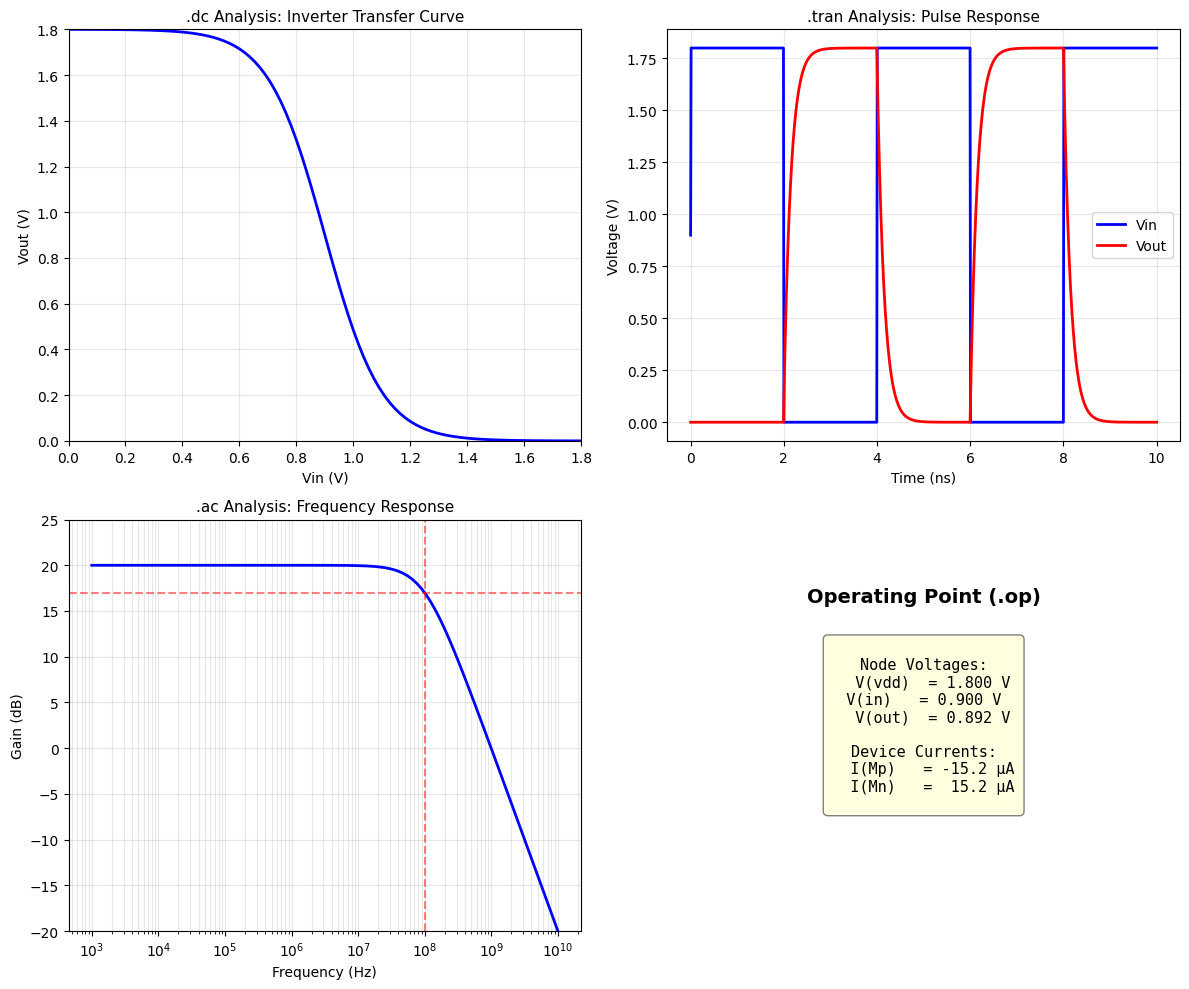

In [3]:
# Demonstrate different analysis types
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# DC Sweep (inverter transfer curve)
ax = axes[0, 0]
vin = np.linspace(0, 1.8, 100)
vout = 1.8 / (1 + np.exp(10 * (vin - 0.9)))
ax.plot(vin, vout, 'b-', linewidth=2)
ax.set_xlabel('Vin (V)')
ax.set_ylabel('Vout (V)')
ax.set_title('.dc Analysis: Inverter Transfer Curve', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 1.8)
ax.set_ylim(0, 1.8)

# Transient (pulse response)
ax = axes[0, 1]
t = np.linspace(0, 10, 1000)
vin = 0.9 + 0.9 * np.sign(np.sin(2 * np.pi * t / 4))
# Simulate RC delay
vout = np.zeros_like(t)
tau = 0.15
for i in range(1, len(t)):
    target = 0 if vin[i] > 0.9 else 1.8
    dt = t[i] - t[i-1]
    vout[i] = vout[i-1] + (target - vout[i-1]) * (1 - np.exp(-dt/tau))
ax.plot(t, vin, 'b-', linewidth=2, label='Vin')
ax.plot(t, vout, 'r-', linewidth=2, label='Vout')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Voltage (V)')
ax.set_title('.tran Analysis: Pulse Response', fontsize=11)
ax.legend()
ax.grid(True, alpha=0.3)

# AC Analysis (Bode plot)
ax = axes[1, 0]
freq = np.logspace(3, 10, 100)  # 1kHz to 10GHz
# Simple single-pole response
f_3db = 1e8  # 100 MHz bandwidth
gain_db = 20 - 20 * np.log10(np.sqrt(1 + (freq/f_3db)**2))
ax.semilogx(freq, gain_db, 'b-', linewidth=2)
ax.axhline(y=17, color='r', linestyle='--', alpha=0.5, label='-3dB point')
ax.axvline(x=f_3db, color='r', linestyle='--', alpha=0.5)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Gain (dB)')
ax.set_title('.ac Analysis: Frequency Response', fontsize=11)
ax.grid(True, alpha=0.3, which='both')
ax.set_ylim(-20, 25)

# Operating Point
ax = axes[1, 1]
ax.text(0.5, 0.8, 'Operating Point (.op)', ha='center', fontsize=14, fontweight='bold',
        transform=ax.transAxes)
op_text = """
Node Voltages:
  V(vdd)  = 1.800 V
  V(in)   = 0.900 V  
  V(out)  = 0.892 V

Device Currents:
  I(Mp)   = -15.2 µA
  I(Mn)   =  15.2 µA
"""
ax.text(0.5, 0.5, op_text, ha='center', va='center', fontsize=11,
        family='monospace', transform=ax.transAxes,
        bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='gray'))
ax.axis('off')

plt.tight_layout()
plt.show()

---
<a id="4-libraries-and-pdks"></a>
# 4. Libraries and PDKs
---

### PDK Device Libraries

A PDK provides SPICE models for all available devices:

**SkyWater 130nm examples:**

| Device | SPICE Model Name | Description |
|--------|-----------------|-------------|
| 1.8V NFET | `sky130_fd_pr__nfet_01v8` | Standard NMOS |
| 1.8V PFET | `sky130_fd_pr__pfet_01v8` | Standard PMOS |
| 3.3V NFET | `sky130_fd_pr__nfet_03v3_nvt` | I/O transistor |
| Poly resistor | `sky130_fd_pr__res_high_po` | High-R poly |
| MIM capacitor | `sky130_fd_pr__cap_mim_m3_1` | Metal capacitor |

### Corner Models

Manufacturing varies! We simulate at multiple **corners**:

| Corner | NMOS | PMOS | Meaning |
|--------|------|------|--------|
| **TT** | Typical | Typical | Nominal process |
| **FF** | Fast | Fast | Best-case speed |
| **SS** | Slow | Slow | Worst-case speed |
| **SF** | Slow | Fast | Skewed |
| **FS** | Fast | Slow | Skewed |

---
<a id="5-behavioral-modeling"></a>
# 5. Behavioral Modeling
---

### When to Use Behavioral Models

Sometimes you don't need transistor-level detail:

- **Early design exploration** - get quick answers
- **Mixed-signal simulation** - analog blocks with digital
- **Complex functions** - ADCs, PLLs, etc.

### Verilog-A Example

```verilog
// Ideal voltage-controlled switch
module vcswitch(p, n, ctrl);
    inout p, n;
    input ctrl;
    electrical p, n, ctrl;
    
    parameter real ron = 1;      // On resistance
    parameter real roff = 1e9;   // Off resistance
    parameter real vth = 0.5;    // Threshold
    
    analog begin
        if (V(ctrl) > vth)
            I(p, n) <+ V(p, n) / ron;
        else
            I(p, n) <+ V(p, n) / roff;
    end
endmodule
```

---
<a id="6-simulation-tips"></a>
# 6. Simulation Tips
---

### Common Issues and Solutions

| Problem | Cause | Solution |
|---------|-------|----------|
| **Convergence failure** | Bad initial conditions | Add `.nodeset` or `.ic` |
| **Slow simulation** | Too many points | Increase step size |
| **Oscillation** | Positive feedback | Check connections |
| **Wrong DC point** | Floating nodes | Add weak pullup/pulldown |

### Simulation Checklist

- [ ] Include correct PDK library
- [ ] Set appropriate simulation time/frequency range
- [ ] Use realistic input waveforms
- [ ] Add load capacitance on outputs
- [ ] Check multiple process corners
- [ ] Verify power consumption

---
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); color: white; padding: 30px; margin: 20px -10px -10px -10px; border-radius: 15px 15px 0 0; text-align: center;">

## Summary

- **Schematic capture** creates a visual circuit representation
- **SPICE** simulates circuit behavior with detailed models
- **Analysis types**: DC, AC, Transient, Operating Point
- **PDK libraries** provide calibrated device models
- **Corner simulation** ensures robustness across process variation

### Homework
1. Draw a 2-input NAND schematic using PDK cells
2. Simulate in SPICE: verify truth table
3. Measure propagation delay (tpd)
4. Pick your project!

</div>